In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data
data = pd.read_csv("diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# EDA

In [3]:
# checking for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# checking the data types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# descriptive statistics
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

As we can see, minimum value for "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" is 0, but this can not be possible. Probably, 0 is for missing values.

In [6]:
# Checking number of missing values for these columns
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in columns:
    print("missing values in",i," :",(data[i] == 0).sum())

missing values in Glucose  : 5
missing values in BloodPressure  : 35
missing values in SkinThickness  : 227
missing values in Insulin  : 374
missing values in BMI  : 11


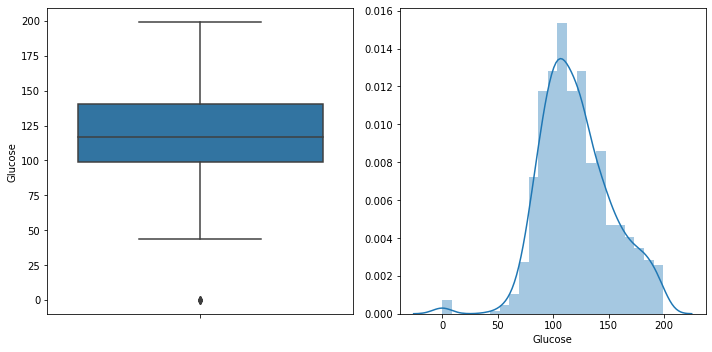

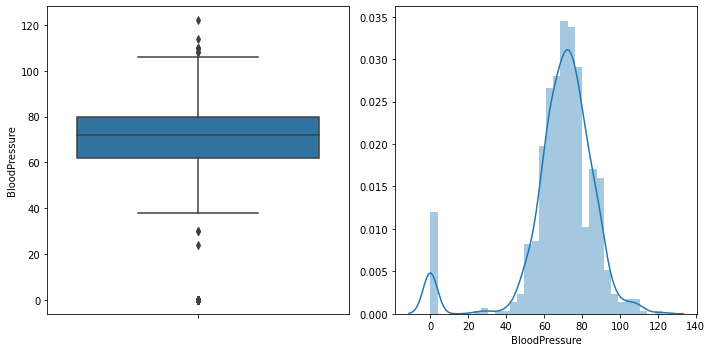

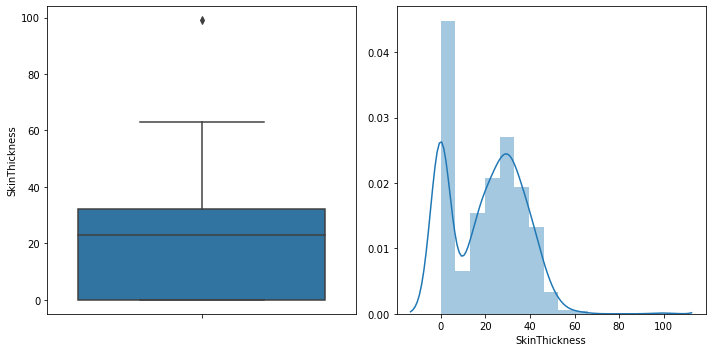

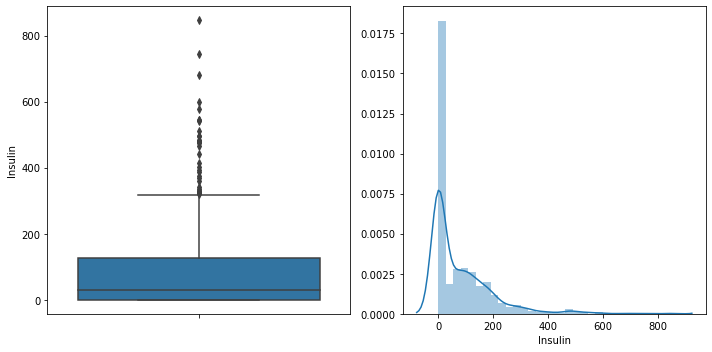

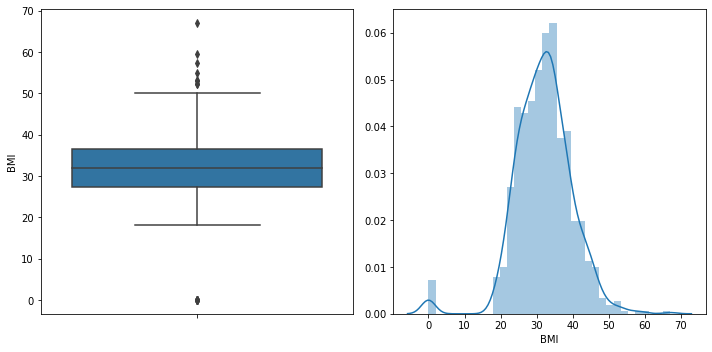

In [7]:
# Checking outliers and distribution of these columns for imputation
for i in columns:
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    sns.boxplot(x=data[i],orient = 'v',ax = axes[0])
    sns.distplot(data[i],ax = axes[1])
    fig.tight_layout()
    

Looking at the outliers and distribution, we can impute the missing values in "Glucose", "BloodPressure" and "BMI" with "mean" value and "SkinThickness" and "Insulin" with "median" value.

In [8]:
# imputing missing values i.e. '0'
data['Glucose'].replace(0,data['Glucose'].mean(),inplace = True)
data['BloodPressure'].replace(0,data['BloodPressure'].mean(),inplace = True)
data['BMI'].replace(0,data['BMI'].mean(),inplace = True)
data['SkinThickness'].replace(0,data['SkinThickness'].median(),inplace = True)
data['Insulin'].replace(0,data['Insulin'].median(),inplace = True)

In [9]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      27.334635   94.652344   
std       3.369578   30.436016      12.115932       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

We have successfully imputed missing value.

Now let's check the outliers in our data and how to handle them.

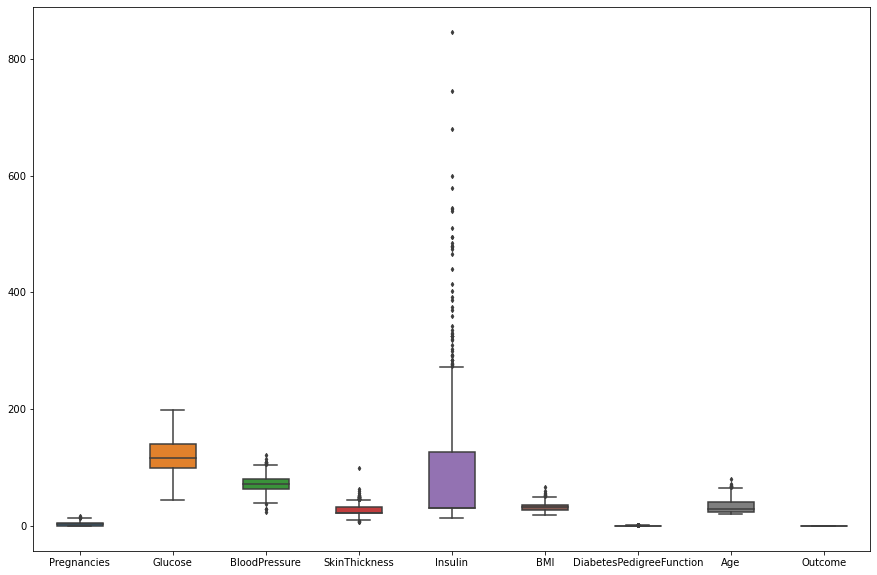

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

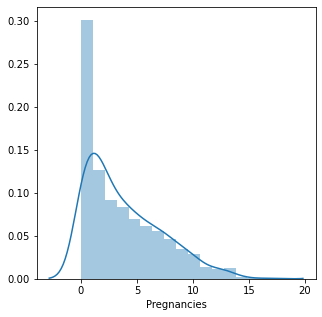

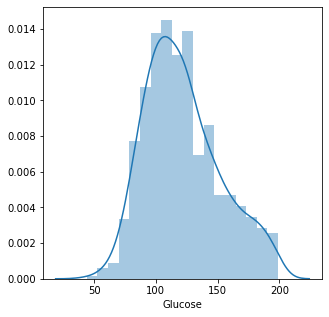

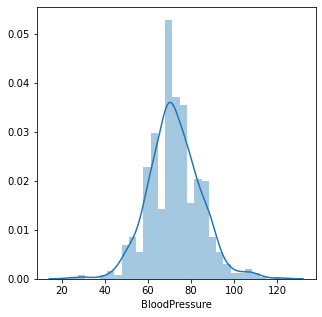

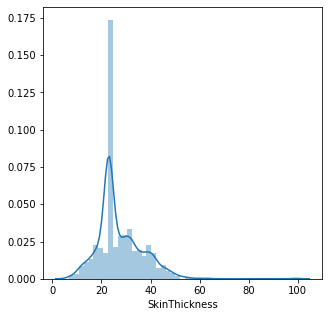

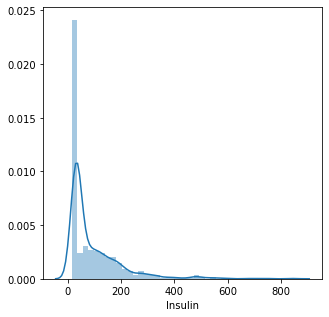

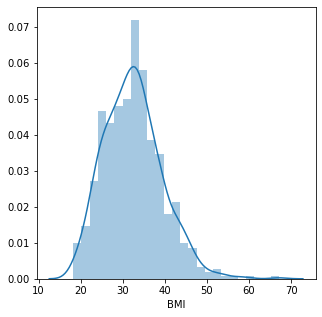

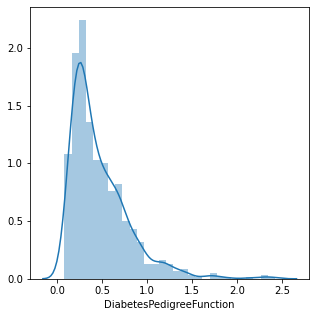

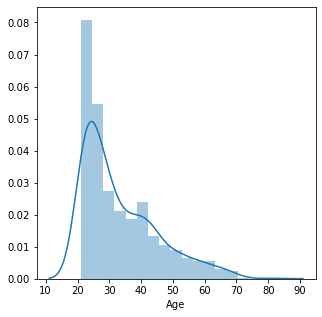

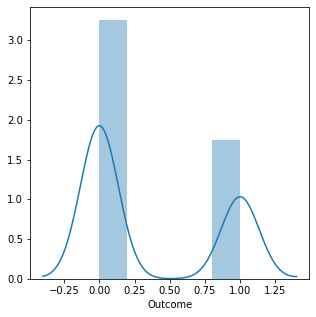

In [11]:
for i in data.columns:
    plt.figure(figsize = (5,5))
    sns.distplot(data[i])

Looking at the outliers in some specific columns and their distribution, outliers are removed

In [12]:
# removing outliers
data = data[data['SkinThickness']<80]
data = data[data['Insulin']<580]
data = data[data['BMI']<60]
data.shape

(762, 9)

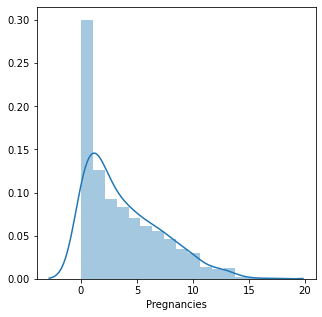

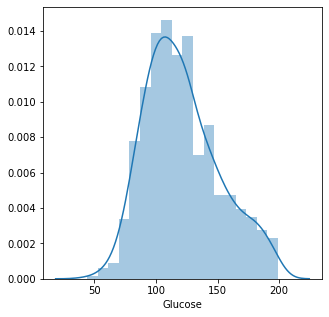

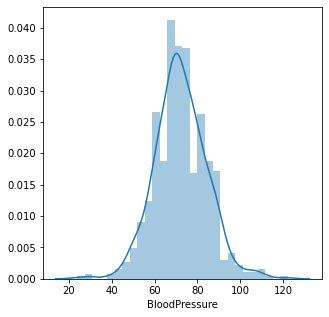

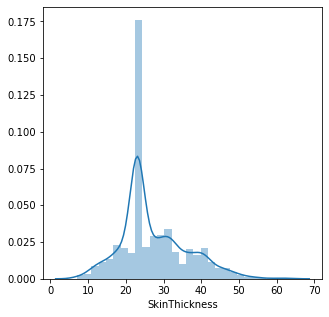

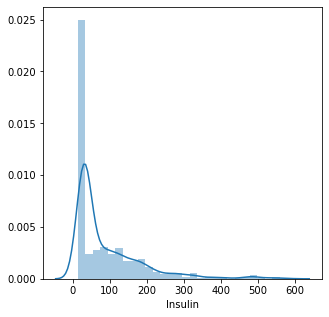

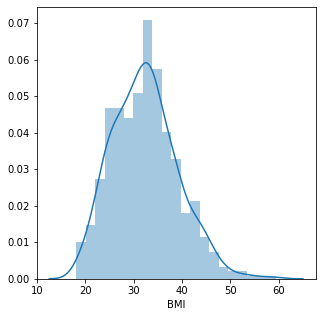

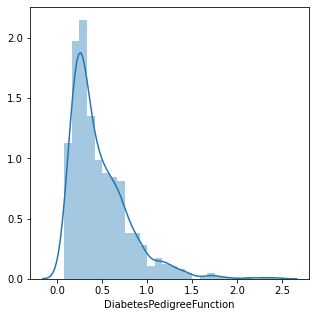

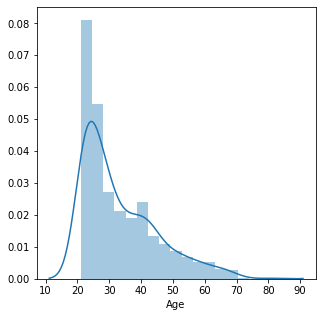

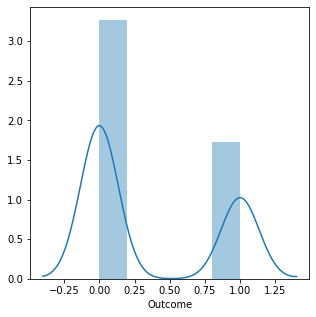

In [13]:
# Looking at the distribution again 
for i in data.columns:
    plt.figure(figsize = (5,5))
    sns.distplot(data[i])

Now, data distribution looks better than before.

In [14]:
# separating dependent and independent features
X = data.drop("Outcome",axis=1)
y = data['Outcome']

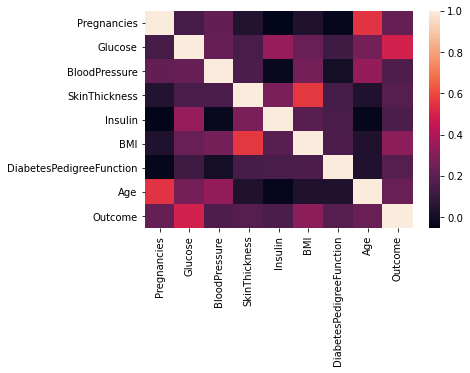

In [15]:
# heatmap for checking correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

There's not much correlation in the data. Hence, no problem of multicollinearity

# Standard Scaling

In [17]:
# scaling the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [18]:
# splitting training and test data (80:20) ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state = 30)

# Support Vector Classifier

In [19]:
from sklearn.svm import SVC
clf_svm1 = SVC()
clf_svm1.fit(X_train,y_train)
y_pred = clf_svm1.predict(X_test)

In [20]:
# accuracy of SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test,y_pred)
print("SVC Accuracy:",accuracy)

SVC Accuracy: 0.7712418300653595


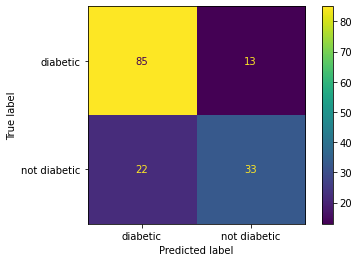

In [21]:
# plotting the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm1,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [23]:
# selecting different parameters to use for improving the SVC Accuracy
param_grid = [
    {'C' : [0.5,1,10,100],
     'gamma' : ['scale','auto',1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear','poly','rbf']}
]

In [24]:
# Hyperparameter optimisation
from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(SVC(),param_grid,cv = 5,scoring = 'accuracy',verbose = 0)
optimal_params.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                    0.0001],
                          'kernel': ['linear', 'poly', 'rbf']}],
             scoring='accuracy')

In [25]:
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [26]:
clf_svm2 = SVC(C = 100, gamma = 0.0001,probability = True)
clf_svm2.fit(X_train,y_train)
svm_y_pred = clf_svm2.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test,svm_y_pred)
print("SVC Accuracy score:",accuracy)

SVC Accuracy score: 0.7843137254901961


Accuracy is improved 

In [28]:
from sklearn.metrics import recall_score,precision_score,f1_score
recall = recall_score(y_test,svm_y_pred)
precision = precision_score(y_test,svm_y_pred)
f1 = f1_score(y_test,svm_y_pred)
print("SVC Recall:",recall)
print("SVC Precision:",precision)
print("SVC F1:",f1)

SVC Recall: 0.5454545454545454
SVC Precision: 0.7894736842105263
SVC F1: 0.6451612903225806


In [29]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        98
           1       0.79      0.55      0.65        55

    accuracy                           0.78       153
   macro avg       0.79      0.73      0.75       153
weighted avg       0.79      0.78      0.77       153



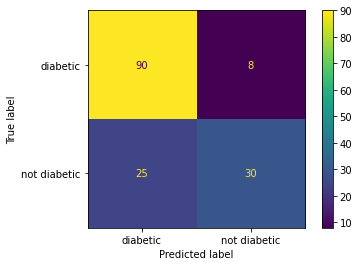

In [30]:
# plotting confusion matrix again
plot_confusion_matrix(clf_svm2,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr_clf1 = LogisticRegression()
lr_clf1.fit(X_train,y_train)
lr_y_pred = lr_clf1.predict(X_test)

In [32]:
accuracy_lr = accuracy_score(y_test,lr_y_pred)
print("Logistic Regression Accuracy:",accuracy_lr)

Logistic Regression Accuracy: 0.7843137254901961


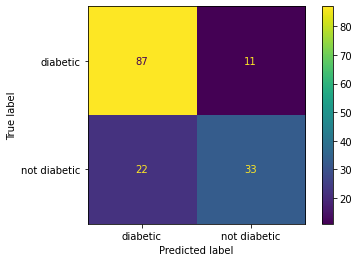

In [33]:
# Plotting confusion matrix
plot_confusion_matrix(lr_clf1,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [34]:
# # Hyperparameter optimisation
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr_optimal_params = GridSearchCV(LogisticRegression(),grid_values,cv =5,verbose = 0)
lr_optimal_params.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']})

In [35]:
print(lr_optimal_params.best_params_)

{'C': 1, 'penalty': 'l2'}


In [36]:
lr_clf2 = LogisticRegression(C = 1, penalty = 'l2')
lr_clf2.fit(X_train,y_train)
lr_y_pred = lr_clf2.predict(X_test)
accuracy = accuracy_score(y_test,lr_y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.7843137254901961


Accuracy remained same

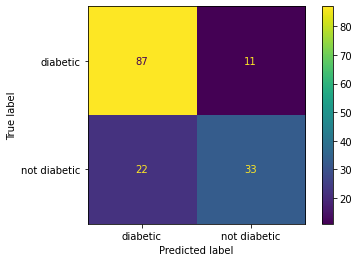

In [37]:
plot_confusion_matrix(lr_clf2,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [38]:
recall = recall_score(y_test,lr_y_pred)
precision = precision_score(y_test,lr_y_pred)
f1 = f1_score(y_test,lr_y_pred)
print("LR Recall:",recall)
print("LR Precision:",precision)
print("LR F1:",f1)

LR Recall: 0.6
LR Precision: 0.75
LR F1: 0.6666666666666665


In [39]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        98
           1       0.75      0.60      0.67        55

    accuracy                           0.78       153
   macro avg       0.77      0.74      0.75       153
weighted avg       0.78      0.78      0.78       153



# Random Forest Classifier

In [40]:
# applying random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 32)
model = rf_clf.fit(X_train,y_train)
rf_y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,rf_y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.7843137254901961


In [41]:
params = [{
    'n_estimators' : [10,20,50,100,200,300,400],
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : range(8,32)
}]
optimal_params = GridSearchCV(RandomForestClassifier(random_state = 32),params,cv =5,verbose = 0)
optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

{'criterion': 'entropy', 'max_leaf_nodes': 29, 'n_estimators': 10}


In [42]:
print(optimal_params.best_params_)

{'criterion': 'entropy', 'max_leaf_nodes': 29, 'n_estimators': 10}


In [43]:
rf_clf = RandomForestClassifier(n_estimators=10,max_leaf_nodes = 29,criterion = 'entropy',random_state = 32 )
model = rf_clf.fit(X_train,y_train)
rf_y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,rf_y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.7843137254901961


Accuracy remained same

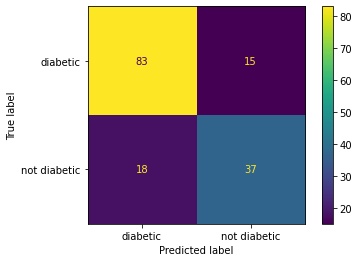

In [44]:
plot_confusion_matrix(rf_clf,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [45]:
recall = recall_score(y_test,rf_y_pred)
precision = precision_score(y_test,rf_y_pred)
f1 = f1_score(y_test,rf_y_pred)
print("RF Recall:",recall)
print("RF Precision:",precision)
print("RF F1:",f1)

RF Recall: 0.6727272727272727
RF Precision: 0.7115384615384616
RF F1: 0.6915887850467289


In [46]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        98
           1       0.71      0.67      0.69        55

    accuracy                           0.78       153
   macro avg       0.77      0.76      0.76       153
weighted avg       0.78      0.78      0.78       153



# Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
gb_y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test,gb_y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.7843137254901961


In [48]:
gb_params = [{
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    'min_samples_leaf' : range(1,6)
}]
gb_optimal_params = GridSearchCV(GradientBoostingClassifier(),gb_params,cv =5,verbose = 0)
gb_optimal_params.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'criterion': ['friedman_mse', 'mse', 'mae'],
                          'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                            0.8, 0.9, 1.0],
                          'min_samples_leaf': range(1, 6)}])

In [49]:
print(gb_optimal_params.best_params_)

{'criterion': 'mse', 'learning_rate': 0.1, 'min_samples_leaf': 4}


In [50]:
gb_clf = GradientBoostingClassifier(criterion = 'mse',learning_rate = 0.1,min_samples_leaf = 4 )
gb_clf.fit(X_train,y_train)
gb_y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test,gb_y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.7777777777777778


Accuracy decreased a little

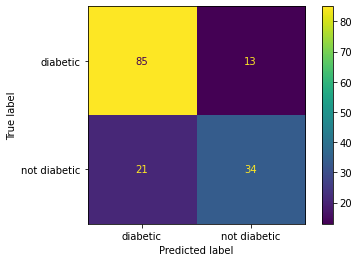

In [51]:
plot_confusion_matrix(gb_clf,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [52]:
recall = recall_score(y_test,gb_y_pred)
precision = precision_score(y_test,gb_y_pred)
f1 = f1_score(y_test,gb_y_pred)
print("GB Recall:",recall)
print("GB Precision:",precision)
print("GB F1:",f1)

GB Recall: 0.6181818181818182
GB Precision: 0.723404255319149
GB F1: 0.6666666666666667


In [53]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,gb_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        98
           1       0.72      0.62      0.67        55

    accuracy                           0.78       153
   macro avg       0.76      0.74      0.75       153
weighted avg       0.77      0.78      0.77       153



# KNN Classifier

In [54]:
# Applying Knn and finding the best value of 'k'
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []
accuracy_max = 0
k_max = 0
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    train_accuracy = knn.score(X_train,y_train)
    train_scores.append(train_accuracy)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_scores.append(test_accuracy)
    if test_accuracy > accuracy_max:
        accuracy_max = test_accuracy
        k_max = i
print("maximum_test_accuracy:",accuracy_max, "is achieved at k:",k_max)

maximum_test_accuracy: 0.7843137254901961 is achieved at k: 7


In [55]:
knn1 = KNeighborsClassifier(7)
knn1.fit(X_train,y_train)
knn_y_pred = knn1.predict(X_test)

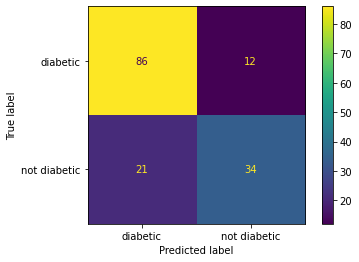

In [56]:
plot_confusion_matrix(knn1,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [57]:
# Hyperparameter optimisation
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn2 = KNeighborsClassifier()
knn_cv= GridSearchCV(knn2,param_grid,cv =5,verbose = 0)
knn_cv.fit(X_train,y_train)

print("Best Parameters: " + str(knn_cv.best_params_))
print(knn_cv.best_score_)

Best Parameters: {'n_neighbors': 17}
0.7635957187372985


In [58]:
knn2 = KNeighborsClassifier(n_neighbors = 17)
knn2.fit(X_train,y_train)
y_pred = knn2.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.7843137254901961

Accuracy remained same

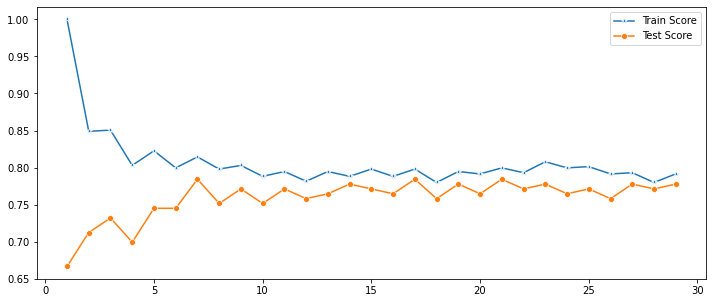

In [80]:
# plotting training and test scores of KNN model
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

We can see that maximum value of k = 17 where the test score is maximum.

We can observe that every model has almost same accuracy score. But Recall score is different for each model. Recall is the ratio of correctly predicted positive values out of all the actual positive values. Here, recall signifies the correctly identified diabetic patients out of all the diabetic patients. This value should be maximum. Random Forest has the maximum recall value.

We can plot ROC curve to identify the best model.

In [62]:
svc_y_pred_proba = clf_svm2.predict_proba(X_test)[:,1]
lr_y_pred_proba = lr_clf2.predict_proba(X_test)[:,1]
rf_y_pred_proba = rf_clf.predict_proba(X_test)[:,1]
gb_y_pred_proba = gb_clf.predict_proba(X_test)[:,1]
knn_y_pred_proba = knn1.predict_proba(X_test)[:,1]

In [63]:
from sklearn.metrics import roc_curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_y_pred_proba)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_y_pred_proba)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_y_pred_proba)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_y_pred_proba)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_y_pred_proba)

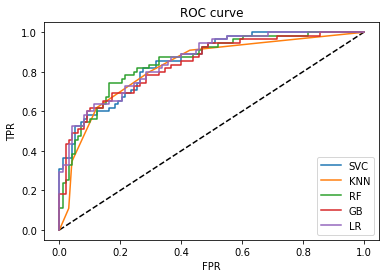

In [64]:
# Plotting the ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_svc,tpr_svc, label='SVC')
plt.plot(fpr_knn,tpr_knn, label='KNN')
plt.plot(fpr_rf,tpr_rf, label='RF')
plt.plot(fpr_gb,tpr_gb, label='GB')
plt.plot(fpr_lr,tpr_lr, label='LR')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC curve')
plt.show()

In [65]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
knn_auc = roc_auc_score(y_test,knn_y_pred_proba)
lr_auc = roc_auc_score(y_test,lr_y_pred_proba)
svc_auc = roc_auc_score(y_test,svc_y_pred_proba)
rf_auc = roc_auc_score(y_test,rf_y_pred_proba)
gb_auc = roc_auc_score(y_test,gb_y_pred_proba)
print("Area under KNN ROC curve:",knn_auc)
print("Area under LR ROC curve:",lr_auc)
print("Area under SVC ROC curve:",svc_auc)
print("Area under RF ROC curve:",rf_auc)
print("Area under GB ROC curve:",gb_auc)

Area under KNN ROC curve: 0.8253246753246752
Area under LR ROC curve: 0.8556586270871985
Area under SVC ROC curve: 0.8519480519480519
Area under RF ROC curve: 0.8506493506493505
Area under GB ROC curve: 0.838404452690167


Area under Logistic Regression,Support Vector Classifier and Random Forest is almost same and more than KNN and Gradient Boost.

# End of the Notebook